# 11/02

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('./1차전처리_데이터셋.csv',encoding='cp949')
df

,요일,주야,사고내용,사고유형,가해자성별,피해자성별,연령가해자,연령피해자,가해자음주,법규위반가해자,...,도로종류,도로형태,노인보호구역_여부,어린이보호구역_여부,자전거도로_여부,도로선형,기상상태,노면상태,교차로형태,사고심각도
0,화,주,경상,보도통행중,여,여,18,68,기타불명,안전운전 의무 불이행,...,기타,기타단일로,아니오,아니오,아니오,평지,맑음,서리/결빙,교차로아님,2
1,토,주,중상,횡단중,남,여,80,75,기타불명,안전운전 의무 불이행,...,시도,기타단일로,아니오,아니오,아니오,평지,맑음,건조,교차로아님,32
2,목,야,경상,길가장자리구역통행중,남,남,18,68,기타불명,안전운전 의무 불이행,...,시도,기타단일로,아니오,아니오,아니오,평지,맑음,건조,교차로아님,2
3,목,주,중상,길가장자리구역통행중,남,여,22,89,기타불명,안전운전 의무 불이행,...,기타,기타단일로,아니오,아니오,아니오,평지,맑음,건조,교차로아님,32
4,목,주,중상,횡단중,여,여,45,85,기타불명,안전운전 의무 불이행,...,기타,기타단일로,아니오,아니오,아니오,평지,맑음,건조,교차로아님,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57565,월,주,경상,길가장자리구역통행중,여,여,53,65,기타불명,안전운전 의무 불이행,...,시도,지하차도(도로)내,아니오,아니오,아니오,평지,맑음,건조,교차로아님,2
57566,금,주,경상,보도통행중,여,남,28,71,해당 없음,기타,...,군도,교차로부근,아니오,아니오,아니오,평지,맑음,건조,교차로 - 삼지,2
57567,금,주,중상,차도통행중,여,남,32,76,해당 없음,안전운전 의무 불이행,...,군도,지하차도(도로)내,아니오,아니오,아니오,평지,맑음,건조,교차로아님,32
57568,토,주,중상,기타,남,여,75,77,해당 없음,안전운전 의무 불이행,...,시도,기타단일로,아니오,아니오,아니오,평지,맑음,건조,교차로아님,32


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57570 entries, 0 to 57569
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          57570 non-null  object
 1   주야          57570 non-null  object
 2   사고내용        57570 non-null  object
 3   사고유형        57570 non-null  object
 4   가해자성별       57570 non-null  object
 5   피해자성별       57570 non-null  object
 6   연령가해자       57570 non-null  int64 
 7   연령피해자       57570 non-null  int64 
 8   가해자음주       57570 non-null  object
 9   법규위반가해자     57570 non-null  object
 10  행동유형가해자     57570 non-null  object
 11  신체상해정도가해자   57570 non-null  object
 12  신체상해정도피해자   57570 non-null  object
 13  가해자신체상해주부위  57570 non-null  object
 14  피해자신체상해주부위  57570 non-null  object
 15  당사자종별가해자    57570 non-null  object
 16  차량용도가해자     57570 non-null  object
 17  도로종류        57570 non-null  object
 18  도로형태        57570 non-null  object
 19  노인보호구역_여부   57570 non-null  object
 20  어린이보호구

---

# PoinPlot 결과 참조하여 분류 범위 간소화

### 사고유형: 보도통행중, 횡단중, 길가장자리구역 통행중, 차도통행중, 기타 => 횡단중, 차도통행 중, 보도_길가장자리_기타 로 세분화

In [47]:
df['사고유형'].unique()

array(['보도통행중', '횡단중', '길가장자리구역통행중', '차도통행중', '기타'], dtype=object)

In [48]:
idx1 = df[df['사고유형']=='보도통행중'].index
for i in idx1:
    df.iloc[:,3][i]=df.iloc[:,3][i].replace('보도통행중','보도_길가장자리_기타')
idx2 = df[df['사고유형']=='길가장자리구역통행중'].index
for i in idx2:
    df.iloc[:,3][i]=df.iloc[:,3][i].replace('길가장자리구역통행중','보도_길가장자리_기타')
idx3 = df[df['사고유형']=='기타'].index
for i in idx3:
    df.iloc[:,3][i]=df.iloc[:,3][i].replace('기타','보도_길가장자리_기타')    

In [49]:
df['사고유형'].unique()

array(['보도_길가장자리_기타', '횡단중', '차도통행중'], dtype=object)

### 연령가해자: 20세이하, 21-30세,31-40세,  .....  ,61-64세,65세 이상으로 구분

In [50]:
age_1=df['연령가해자'].unique()
age_1

array([ 18,  80,  22,  45,  58,  34,  42,   0,  48,  53,  33,  85,  47,
        67,  57,  72,  60,  39,  19,  52,  71,  49,  43,  54,  56,  41,
        23,  66,  27,  44,  46,  26,  61,  63,  65,  36,  38,  35,  21,
        62,  64,  37,  17,  68,  30,  50,  59,  55,  69,  24,  40,  51,
        70,  31,  32,  28,  73,   9,  29,  78,  74,  77,  75,  13,  82,
        16,  76,  25,  87,  20,  84,  12,  81,  79,  83,  93,  10,  15,
         6,  86,  14,  11,  94,  88,   7,  99,   8,   4,  89,  90, 119,
        98,  91,   5,  92], dtype=int64)

In [51]:
for i in range(len(df['연령가해자'])):
    if int(df.iloc[:,6][i])<=20:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'20세이하')
    elif 21<=int(df.iloc[:,6][i])<=30:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'21-30세')
    elif 31<=int(df.iloc[:,6][i])<=40:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'31-40세')
    elif 41<=int(df.iloc[:,6][i])<=50:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'41-50세')
    elif 51<=int(df.iloc[:,6][i])<=60:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'51-60세')
    elif 61<=int(df.iloc[:,6][i])<=64:
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'61-64세')    
    elif 65<=int(df.iloc[:,6][i]):
        age=str(df.iloc[:,6][i])
        df.iloc[:,6][i]=str(df.iloc[:,6][i]).replace(age,'65세이상')

### 가해자음주: 개정된 법 기준으로 하겠음  / 0.03% 미만, 해당없음 => 해당없음 / 측정불응, 기타불명 => 기타 / 나머지 => 음주운전 으로 묶어버리겠음

In [55]:
df['가해자음주'].unique()

array(['기타불명', '0.15%~0.19%', '0.05%~0.09%', '0.10%~0.14%', '0.20%~0.24%',
       '측정불응', '해당 없음', '0.03%미만', '0.25%~0.29%', '0.030~0.049%',
       '0.35%이상', '0.30%~0.34%'], dtype=object)

In [56]:
idx1 = df[df['가해자음주']=='기타불명'].index
for i in idx1:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('기타불명','기타')
idx2 = df[df['가해자음주']=='측정불응'].index
for i in idx2:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('측정불응','기타')

In [58]:
idx1 = df[df['가해자음주']=='0.03%미만'].index
for i in idx1:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.03%미만','해당 없음')

In [60]:
idx1 = df[df['가해자음주']=='0.15%~0.19%'].index
for i in idx1:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.15%~0.19%','음주운전')
    
idx2 = df[df['가해자음주']=='0.05%~0.09%'].index
for i in idx2:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.05%~0.09%','음주운전')
    
idx3 = df[df['가해자음주']=='0.10%~0.14%'].index
for i in idx3:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.10%~0.14%','음주운전')
    
idx4 = df[df['가해자음주']=='0.20%~0.24%'].index
for i in idx4:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.20%~0.24%','음주운전')
    
idx5 = df[df['가해자음주']=='0.25%~0.29%'].index
for i in idx5:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.25%~0.29%','음주운전')
    
idx6 = df[df['가해자음주']=='0.030~0.049%'].index
for i in idx6:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.030~0.049%','음주운전')
    
idx7 = df[df['가해자음주']=='0.35%이상'].index
for i in idx7:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.35%이상','음주운전')
    
idx8 = df[df['가해자음주']=='0.30%~0.34%'].index
for i in idx8:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('0.30%~0.34%','음주운전')

In [61]:
df['가해자음주'].unique()

array(['기타', '음주운전', '해당 없음'], dtype=object)

### 도로형태: 불명 => 기타/불명 / 교차로횡단보도내 => 교차로내

In [63]:
df['도로형태'].unique()

array(['기타단일로', '교차로내', '횡단보도부근', '교차로부근', '횡단보도상', '기타/불명', '교량위',
       '교차로횡단보도내', '주차장', '불명', '터널안', '지하차도(도로)내', '고가도로위'], dtype=object)

In [64]:
idx1 = df[df['도로형태']=='불명'].index
for i in idx1:
    df.iloc[:,3][i]=df.iloc[:,3][i].replace('불명','기타/불명')
idx2 = df[df['도로형태']=='교차로횡단보도내'].index
for i in idx2:
    df.iloc[:,3][i]=df.iloc[:,3][i].replace('교차로횡단보도내','교차로내')

### '연령피해자' , '자전거도로_여부' 컬럼 삭제 

In [67]:
df=df.drop(['연령피해자','자전거도로_여부'],axis=1)

In [68]:
df

,요일,주야,사고내용,사고유형,가해자성별,피해자성별,연령가해자,가해자음주,법규위반가해자,행동유형가해자,...,차량용도가해자,도로종류,도로형태,노인보호구역_여부,어린이보호구역_여부,도로선형,기상상태,노면상태,교차로형태,사고심각도
0,화,주,경상,보도_길가장자리_기타,여,여,20세이하,기타,안전운전 의무 불이행,직진 중,...,자전거,기타,기타단일로,아니오,아니오,평지,맑음,서리/결빙,교차로아님,2
1,토,주,중상,횡단중,남,여,65세이상,기타,안전운전 의무 불이행,직진 중,...,승용차,시도,기타단일로,아니오,아니오,평지,맑음,건조,교차로아님,32
2,목,야,경상,보도_길가장자리_기타,남,남,20세이하,기타,안전운전 의무 불이행,직진 중,...,승용차,시도,기타단일로,아니오,아니오,평지,맑음,건조,교차로아님,2
3,목,주,중상,보도_길가장자리_기타,남,여,21-30세,기타,안전운전 의무 불이행,후진 중,...,화물차,기타,기타단일로,아니오,아니오,평지,맑음,건조,교차로아님,32
4,목,주,중상,횡단중,여,여,41-50세,기타,안전운전 의무 불이행,직진 중,...,승용차,기타,기타단일로,아니오,아니오,평지,맑음,건조,교차로아님,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57565,월,주,경상,보도_길가장자리_기타,여,여,51-60세,기타,안전운전 의무 불이행,직진 중,...,승용차,시도,지하차도(도로)내,아니오,아니오,평지,맑음,건조,교차로아님,2
57566,금,주,경상,보도_길가장자리_기타,여,남,21-30세,해당 없음,기타,후진 중,...,승용차,군도,교차로부근,아니오,아니오,평지,맑음,건조,교차로 - 삼지,2
57567,금,주,중상,차도통행중,여,남,31-40세,해당 없음,안전운전 의무 불이행,직진 중,...,승용차,군도,지하차도(도로)내,아니오,아니오,평지,맑음,건조,교차로아님,32
57568,토,주,중상,보도_길가장자리_기타,남,여,65세이상,해당 없음,안전운전 의무 불이행,직진 중,...,승용차,시도,기타단일로,아니오,아니오,평지,맑음,건조,교차로아님,32


---

In [69]:
data=df
data.to_csv('TEST2_전처리완료_데이터.csv',encoding='cp949')

---

# TEST_1. 요일+주야

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57570 entries, 0 to 57569
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          57570 non-null  object
 1   주야          57570 non-null  object
 2   사고내용        57570 non-null  object
 3   사고유형        57570 non-null  object
 4   가해자성별       57570 non-null  object
 5   피해자성별       57570 non-null  object
 6   연령가해자       57570 non-null  object
 7   가해자음주       57570 non-null  object
 8   법규위반가해자     57570 non-null  object
 9   행동유형가해자     57570 non-null  object
 10  신체상해정도가해자   57570 non-null  object
 11  신체상해정도피해자   57570 non-null  object
 12  가해자신체상해주부위  57570 non-null  object
 13  피해자신체상해주부위  57570 non-null  object
 14  당사자종별가해자    57570 non-null  object
 15  차량용도가해자     57570 non-null  object
 16  도로종류        57570 non-null  object
 17  도로형태        57570 non-null  object
 18  노인보호구역_여부   57570 non-null  object
 19  어린이보호구역_여부  57570 non-null  object
 20  도로선형  

In [135]:
x=pd.DataFrame(data[['요일','주야']])
y=pd.DataFrame(data['사고심각도'])

In [136]:
x_dum=pd.get_dummies(x,drop_first=True)
x_dum

,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,주야_주
0,0,0,0,0,0,1,1
1,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
57565,0,0,1,0,0,0,1
57566,0,0,0,0,0,0,1
57567,0,0,0,0,0,0,1
57568,0,0,0,0,1,0,1


## 상관분석

In [137]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [138]:
# 한글 폰트 깨지는 것 때문에 추가함
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [139]:
result = pd.concat([x_dum,y],axis=1)
cor_data = result.corr()

<AxesSubplot:>

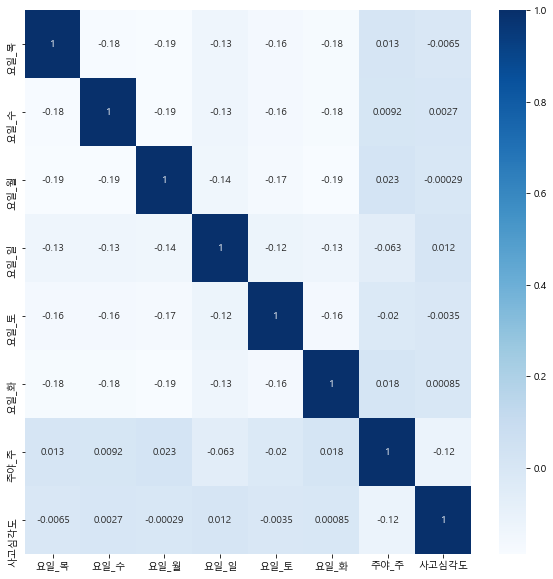

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_data, cbar = True, annot = True, square = False, cmap = 'Blues')

---

# TEST_2. 사고유형

In [141]:
x=pd.DataFrame(data['사고유형'])
y=pd.DataFrame(data['사고심각도'])
x_dum=pd.get_dummies(x,drop_first=True)
result = pd.concat([x_dum,y],axis=1)
cor_data = result.corr()

<AxesSubplot:>

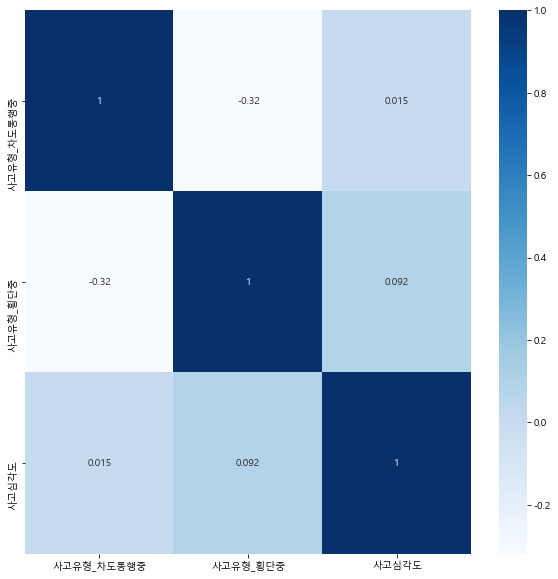

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_data, cbar = True, annot = True, square = False, cmap = 'Blues')

---

# TEST_3. 법규위반가해자+행동유형가해자+도로형태

<AxesSubplot:>

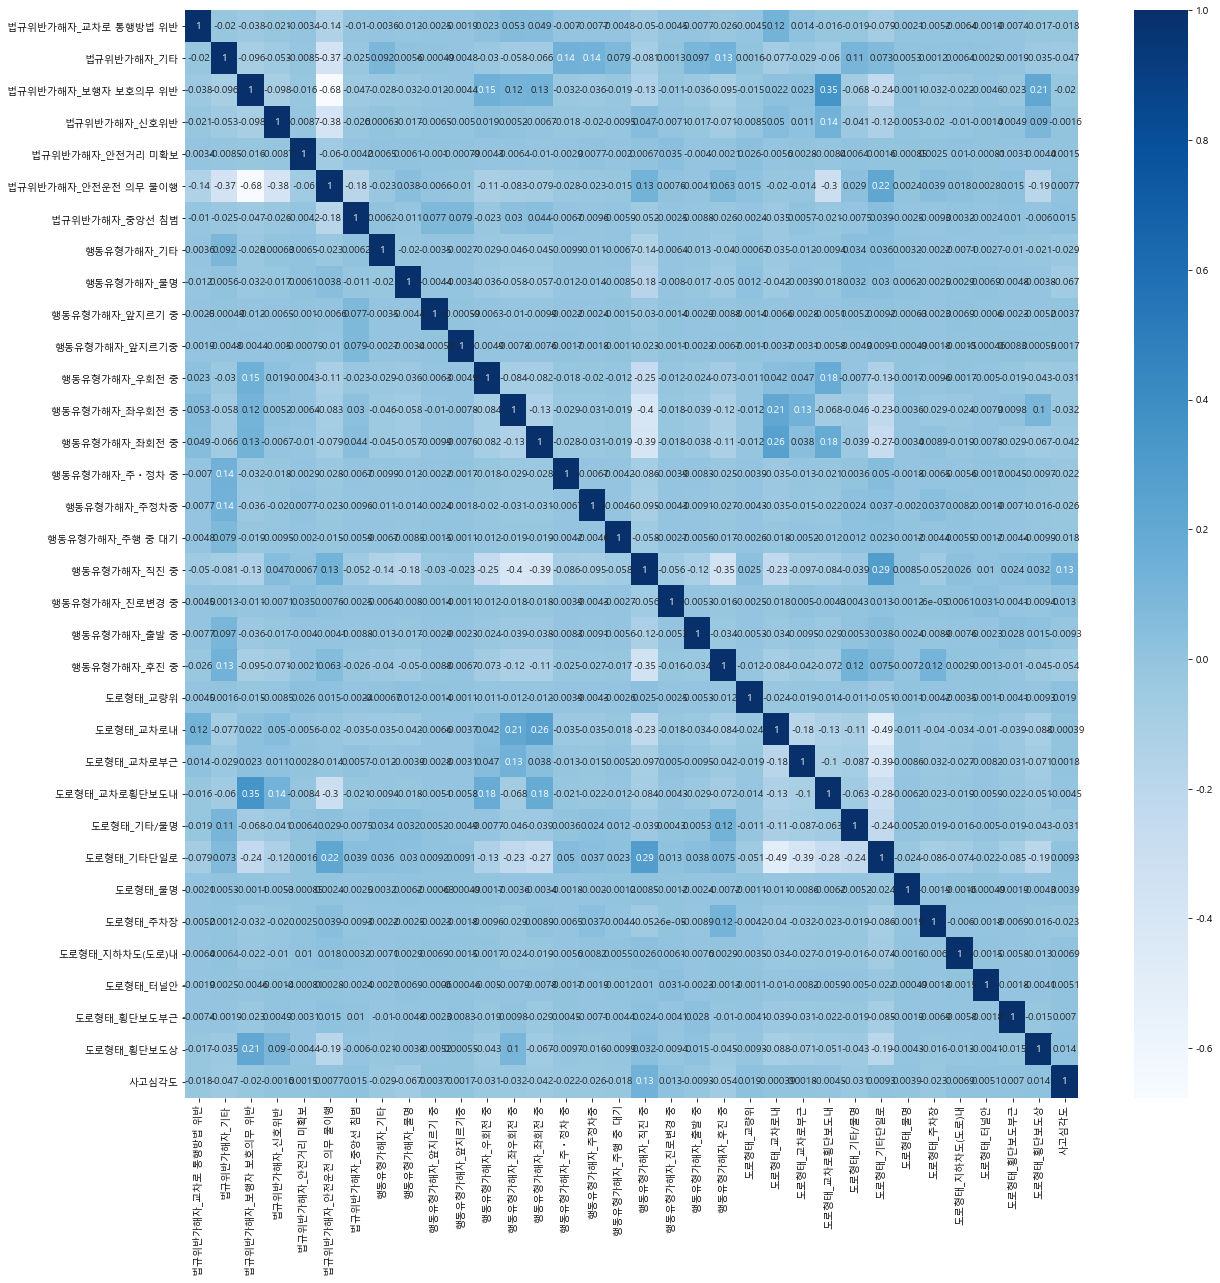

In [143]:
x=pd.DataFrame(data[['법규위반가해자','행동유형가해자','도로형태']])
y=pd.DataFrame(data['사고심각도'])
x_dum=pd.get_dummies(x,drop_first=True)
result = pd.concat([x_dum,y],axis=1)
cor_data = result.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_data, cbar = True, annot = True, square = False, cmap = 'Blues')

---

# TEST_4. 연령가해자

<AxesSubplot:>

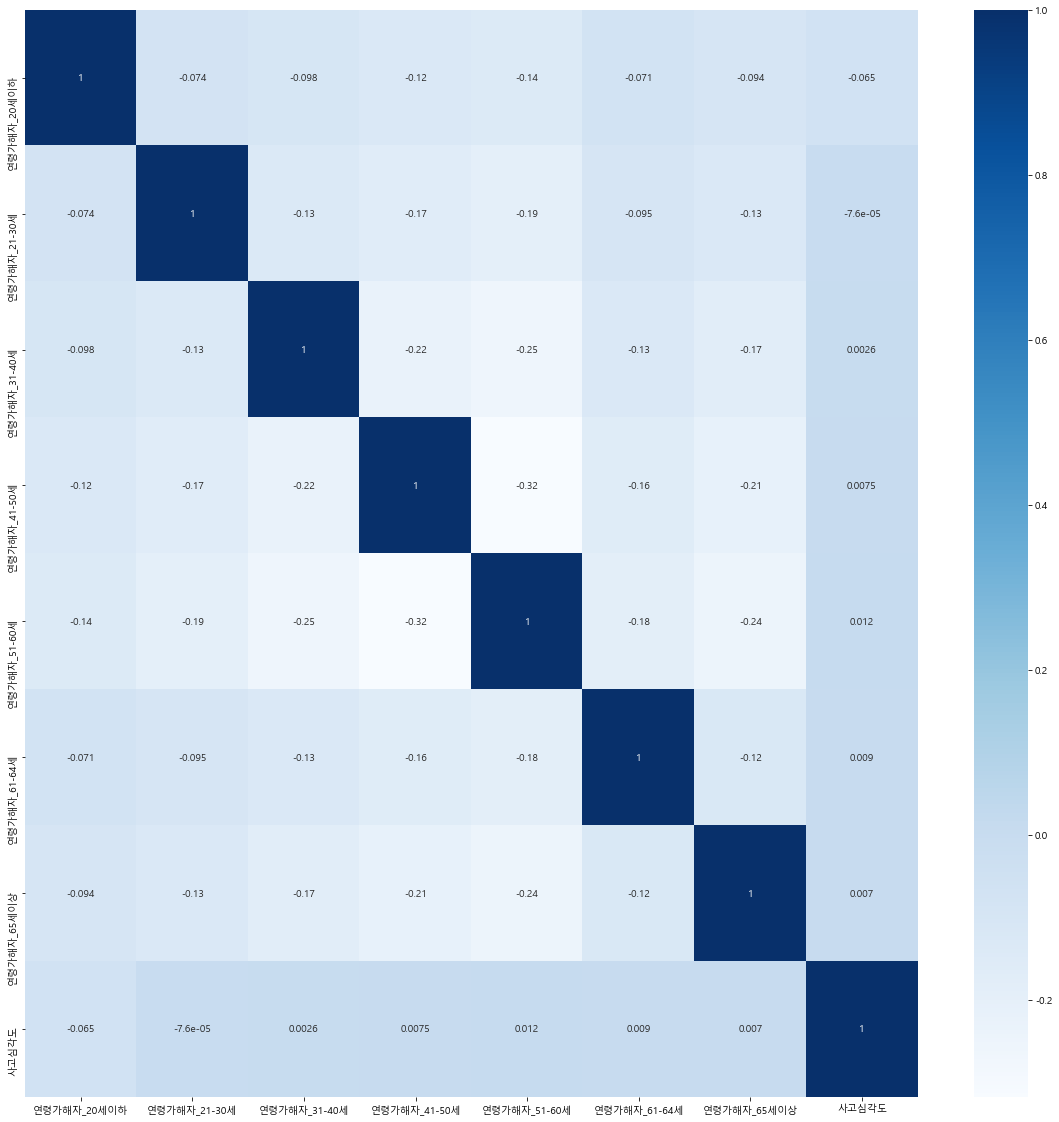

In [130]:
x=pd.DataFrame(data[['연령가해자']])
y=pd.DataFrame(data['사고심각도'])
x_dum=pd.get_dummies(x)
result = pd.concat([x_dum,y],axis=1)
cor_data = result.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_data, cbar = True, annot = True, square = False, cmap = 'Blues')

---

### 종속변수 EPDO에 변형을 주지 않으면 계속해서 같은 결과가 나올 것으로 보여짐

---